<a href="https://colab.research.google.com/github/metaperson1/metaperson1/blob/main/Titanic_survivor_classification_problem_with_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Be the hero of the day by predicting the survival of Titanic passengers

Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 

**In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**
GoodLuck!!!

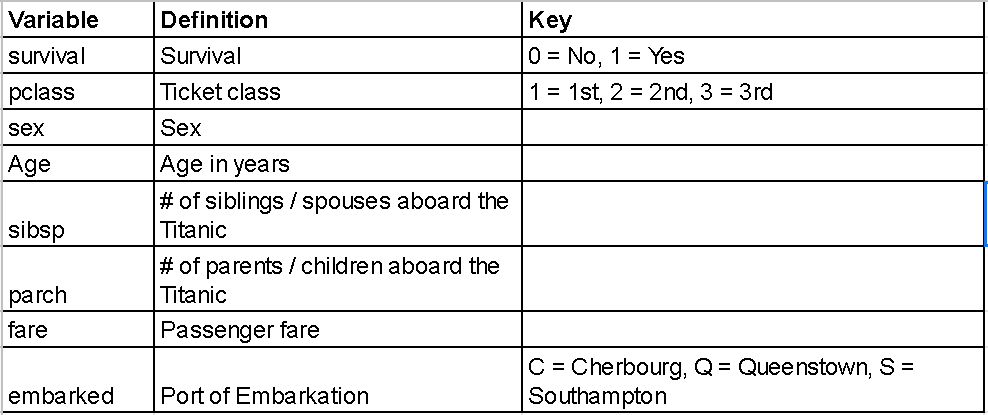

In [146]:
# For running pandas_profiling
# ! pip install pandas==0.25.3
# ! pip install numpy==1.16.5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score

In [147]:
url = 'https://drive.google.com/file/d/1BNrbPshNvrNHiTe1o-Cp1gpJKY-chv5Z/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

titanic = pd.read_csv(url)

In [148]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [149]:
def clean(titanic):
  titanic = titanic.drop(["Embarked", "Parch", "Embarked"], axis=1)

  cols = ["Age"]
  for col in cols:
    titanic[col].fillna(titanic[col].median(), inplace=True )
    return titanic

titanic = clean(titanic)


In [150]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [151]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [152]:
ProfileReport(titanic)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,6
Number of observations,891
Total Missing (%),0.0%
Total size in memory,41.9 KiB
Average record size in memory,48.1 B
Numeric,4
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


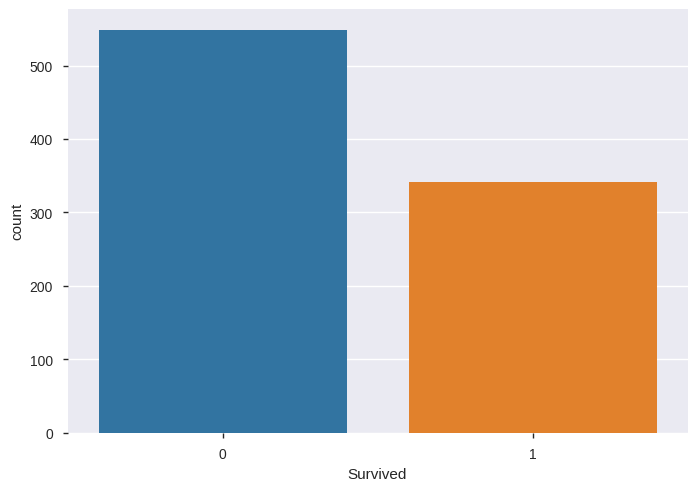

In [153]:
sns.countplot(x = "Survived", data = titanic)

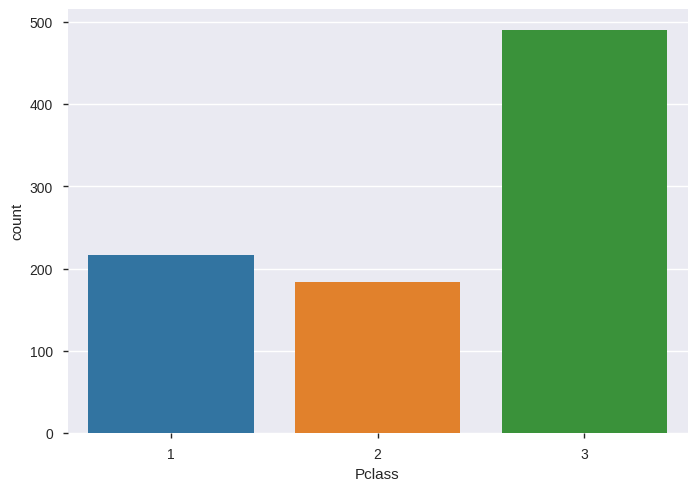

In [154]:
sns.countplot(x = "Pclass", data = titanic)

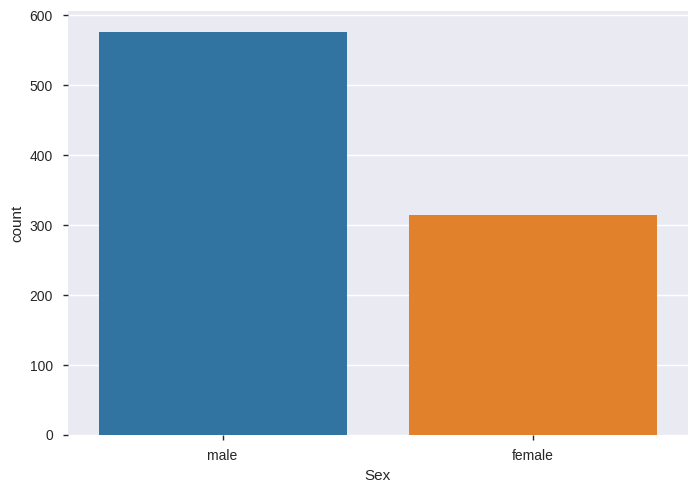

In [155]:
sns.countplot(x = "Sex", data = titanic)

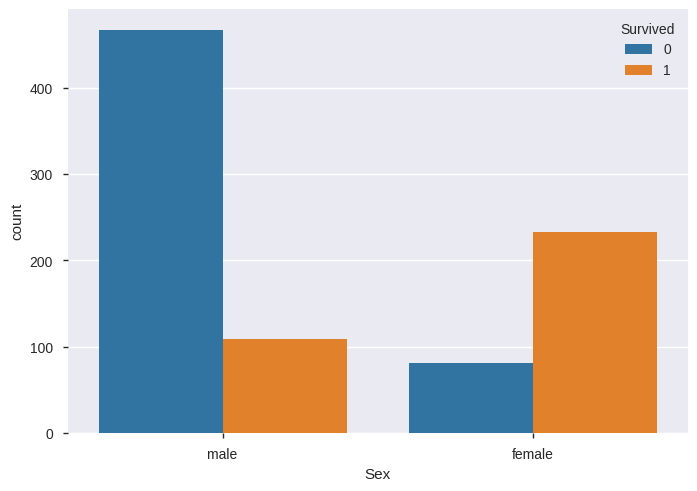

In [156]:
sns.countplot(x = "Sex", hue = "Survived", data = titanic)

In [157]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

cols = ["Sex"]

for col in cols:
  titanic[col] = le.fit_transform(titanic[col])
  print(le.classes_)

['female' 'male']


### **MODEL BUILDING**

In [161]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

y = titanic["Survived"]
X = titanic.drop(["Survived"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [162]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [163]:
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7982062780269058

In [164]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

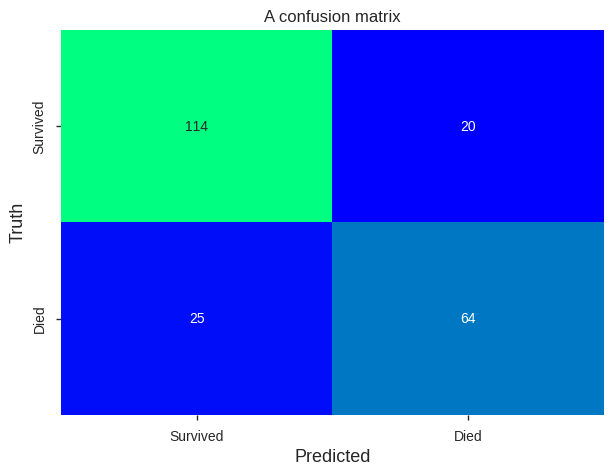

In [165]:
ConfusionMatrix(y_test, predictions, label= ["Survived", "Died"])

In [180]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)


0.7398843930635838